### Agrupamiento (clustering)

Este tipo de tareas usualmente se realizan como parte de un problema de aprendizaje no supervisado. Esto quiere decir que el conjunto de datos sobre el que se ajustará el modelo no cuenta con etiquetas de contraste, y son estos algoritmos los que generan etiquetas candidatas que emanan directamente de la naturaleza de los datos. Estas etiquetas definirán un nuevo atributo denominado de ahora en adelante como **cluster**, los cuales no son mas que subconjuntos de nuestros datos agrupados bajo un criterio de similitud.

Dos de los algoritmos más comúnmente empleados en estas situaciones son el de **agrupamiento jerárquico (clustering jerárquico)** y el de **k-promedios (k-means)**. Para hablar de éstos de manera cómoda presentaremos dos conceptos:

### Variabilidad (no varianza)

Esta se define al interior de un cluster como la varianza del cluster multiplicada por el número de elementos del cluster, *i.e.* se trata de la varianza sin normalizar:

$$Variabilidad(c_k) = \Sigma_{i=1}^{n_k} distancia(e_i,promedio(c_k))^2$$

**Observación:** se utiliza la variabilidad y no la varianza ya que se busca penalizar aquellos clusters que agrupen observaciones con magnitudes grandes y que a la vez posean mucha variación interna en comparación con aquellos clusters con alta variación pero que contengan elementos con magnitudes pequeñas. Moraleja: *grande y variado es peor que pequeño y variado*.

### Disimilaridad

Mientras que la disimilaridad es un concepto que sólo tiene sentido considerando distintos clusters:

$$Disimilaridad(C)=\Sigma_{k=i}^{k=j} variabilidad(c_k)$$

Esta medida agrupa las varianzas de un conjunto $C$, conformado por $c_k$ clusters y mide la cantidad de variabilidad que abarcan éstos en conjunto. 

**Observación:** si comparáramos parejas de clusters mediante su medida de disimilaridad, aquella pareja con una disimilaridad menor se dice que es la más similar.

Más aún, valdría la pena pensar en si la disimilaridad es una medida que vale la pena minimizar o maximizar. Para entender lo que esto implicaría podemos pensar en un caso límite que contemplaría un escenario con disimilaridad mínima, ¿cómo podemos alcanzar dicho escenario?. Si consideramos el caso en el que tenemos $N$ observaciones, podríamos alcanzar lo anterior a partir de definir $N$ clusters, en consecuencia cada cluster estaría conformado por una única observación.

Aunque lo anterior puede sonar un poco ingenuo, define el primer paso o caso base para llevar a cabo un algorimto de **agrupamiento jerárquico aglomerativo**.

### Agrupamiento jerárquico aglomerativo (hierarchical clustering)

Los pasos para llevar a cabo este agrupamiento son:

1. Asignar a cada observación a un cluster de tal manera que si se tienen $N$ observaciones se termine con $N$ clusters.
2. Identificar la pareja de clusters más similares (con la disimilaridad menor) y unirlos en un solo cluster.
3. Repetir el proceso hasta que todos los objetos terminan dentro de un cluster de tamaño $N$.

Este procedimiento lo que va generando es un diagrama conocido como dendograma, el cuál es un árbol en el sentido de la teoría de gráficas y es un paradigma de agrupamiento utilizado típicamente en ramas de la biología para representar las relaciones filogenéticas o ecológicas que existen en un cierto grupo de organismos. Estos organismos están representados por observaciones en donde los vectores de características que los describen pueden ser atributos propios del organismo (como su talla o sus características alométricas), características ecológicas del lugar en donde habitan (temperatura, pH, presión, entre otras) o su secuencia de ADN o algún subconjunto de la misma (la secuencia que corresponde a alguna proteína o a alguna subunidad que sea de interés). 

Los pasos anteriormente citados suelen estar sujetos a algún umbral o restricción usualmente definido a partir de obtener un cierto número de clusters.

¿Cómo medimos la similitud entre clusters?, o en otras palabras, ¿qué medida de distancia usamos para definir lo anterior?

Existen muchas distancias que pueden usarse para responder lo anterior (consultar notebook previo de ) y una vez elegida alguna, es importante mencionar que existen tres tipos de criterios conocidos como **métricas de enlace** para definir la similitud existente entre dos clusters:

1. *Enlace simple (single linkage)*: este tipo de comparación considera elgir alguna medida de distancia y posteriormente establecer la distincia entre dos clusters como el mínimo de todas las distancias posibles par a par entre los elementos de los diferentes clusters.
2. *Enlace completo (complete linkage)*: bajo este supuesto se replica el criterio anterior pero utilizando el máximo de las distancias par a par calculadas entre elementos de clusters diferentes.
3. *Enlace promedio (average linkage)*: como su nombre lo indica se utiliza la distancia promedio de todas las distancias calculadas par a par entre los elementos del cluster.

Es importante decir que dada una medida de distancia y una métrica de enlace, este algoritmo es completamente **determinista**. Esto quiere decir que siempre obtendremos el mismo resultado si repetimos el procedimiento descrito arriba. Un problema que tiene sin embargo, es que suele ser computacionalmente costoso, **su complejidad computacional es de $n^3$** y esta situación suele ser característica de los algoritmos de golosos (greedy algorithms), los cuales suele buscar soluciones óptimas localmente que no necesariamente son óptimas globalmente.

,TITLE,RELEASE,RATING,DIST,GENRE,LOCS,SCRNS,BO_WKND,BO_TOTAL,ADM_WKND,DUR,BO_WK,ADM_TOTAL,ADM_WK,LAMBDA,SCRNS_LOCS,LOG_LOCS,LOG_ADM
,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Captain America: Civil War,2016-04-29,B,DISNEY,Action,730,5422,354028200,728156354,6538384,147,475899228,14523084,8789164,0.6041858,7.43,2.863323,6.815470
2,Avengers: Age Of Ultron,2015-04-30,B,DISNEY,Action,687,4965,290468916,784073372,5306254,141,403092796,15735344,7363655,0.4669691,7.23,2.836957,6.724788
3,Minions,2015-07-09,AA,UPI,Animation,694,4369,250909459,724796427,4938605,97,380556155,16145698,7490417,0.4629265,6.30,2.841359,6.693604
4,Furious 7,2015-04-02,B,UPI,Action,687,4580,236081504,779309756,4295462,137,373583167,15534502,6797281,0.4365603,6.67,2.836957,6.633010
5,Batman V Superman: Dawn Of Justice,2016-03-24,B,WBI,Action,725,4677,215099113,630763242,4171804,151,325021610,13259960,6303729,0.4743958,6.45,2.860338,6.620324
6,Marvel's The Avengers,2012-04-27,B,DISNEY,Action,591,3168,221221483,827128642,4041580,140,403505984,15943601,7371805,0.4613677,5.36,2.771587,6.606551


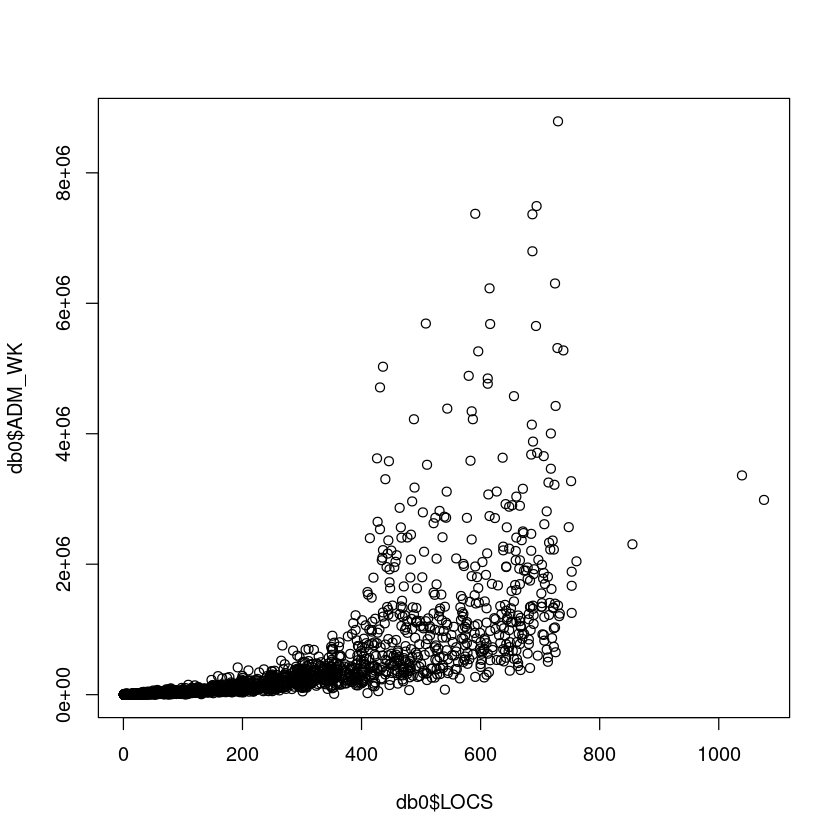

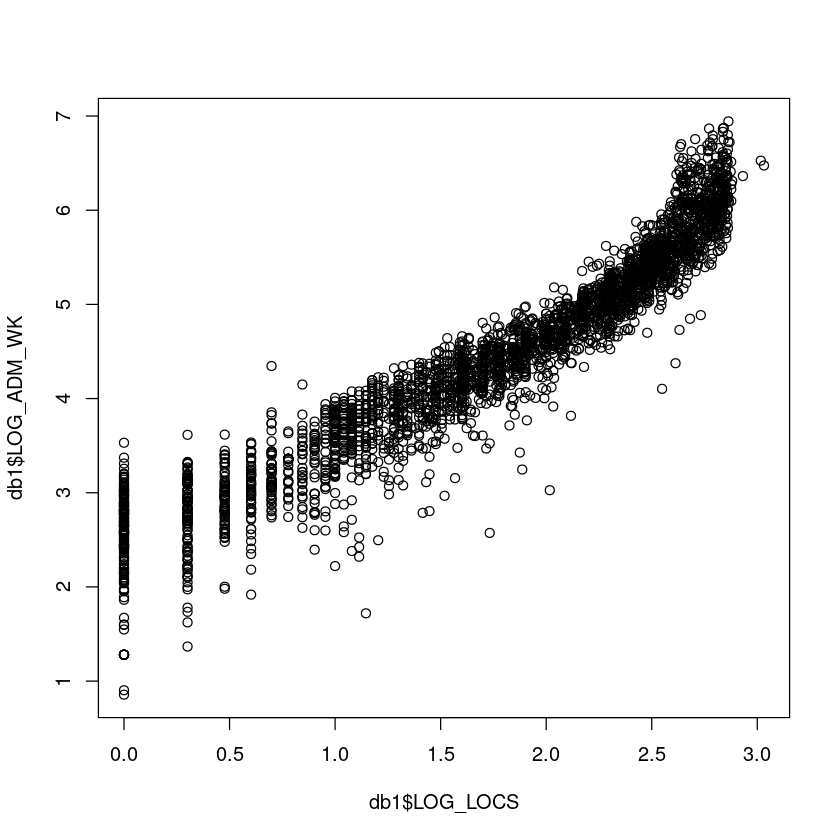

In [ ]:
library(ggplot2)
db = read.csv('peliculas.csv')
head(db)
#db = db[db$GENRE=="Horror",]

db0 = data.frame("GENRE" = db$GENRE, "LOCS" = db$LOCS, "ADM_WK" = db$ADM_WK)
db1 = data.frame("GENRE" = db$GENRE, "LOG_LOCS" = log(db$LOCS,10), "LOG_ADM_WK" = log(db$ADM_WK,10))

plot(db0$LOCS, db0$ADM_WK)
plot(db1$LOG_LOCS, db1$LOG_ADM_WK)

Warning message in dist(db0):
“NAs introduced by coercion”


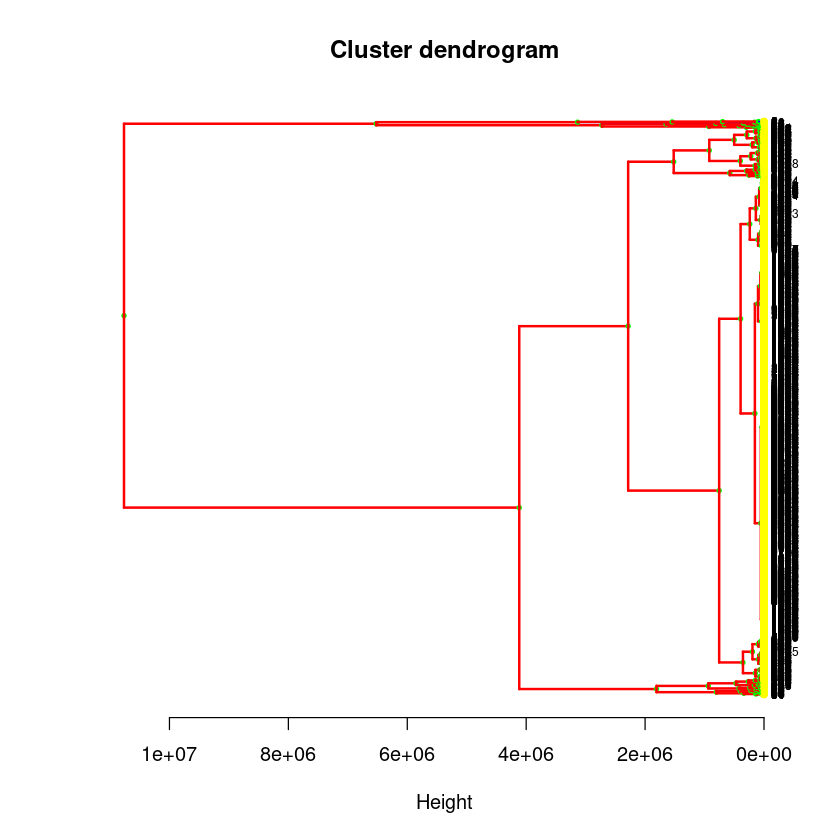

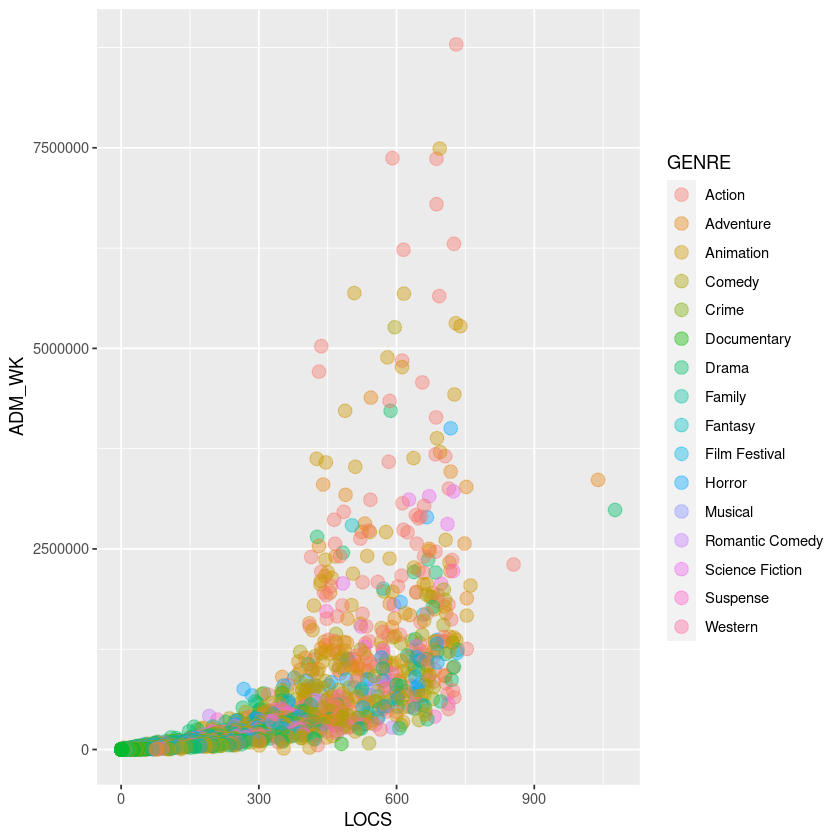

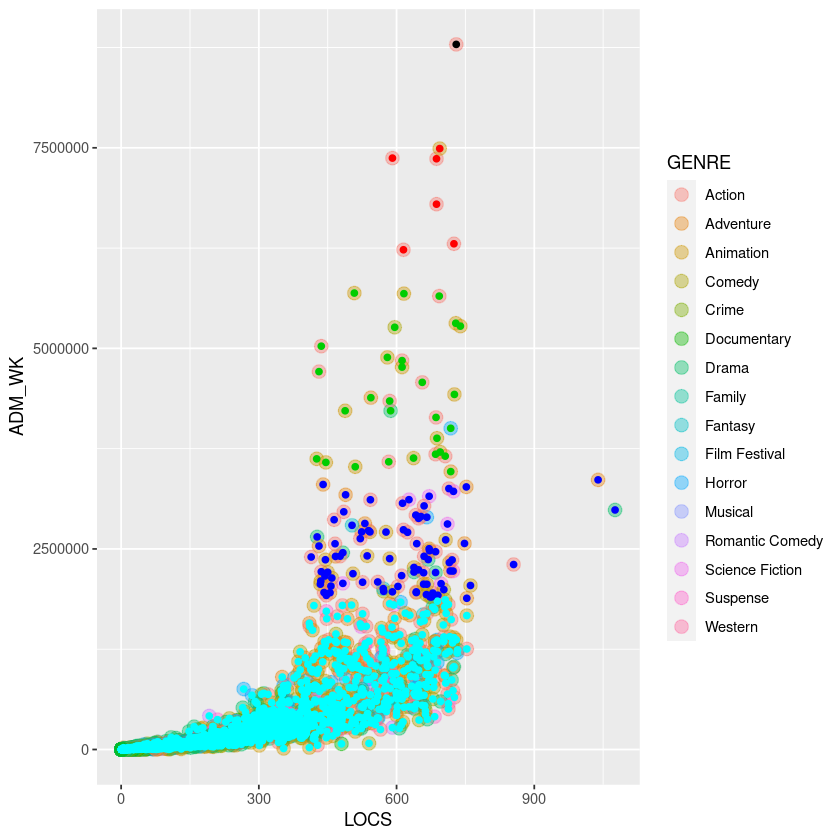

In [ ]:
plot_dendogram = function(cluster){
    hcd = as.dendrogram(cluster)
    nodePar = list(lab.cex = 0.6, pch = c(20, 19),
                    cex = 0.7, col = c("green","yellow"))
    plot(hcd,  xlab = "Height", nodePar = nodePar, main = "Cluster dendrogram",
         edgePar = list(col = c("red","blue"), lwd = 2:1), horiz = TRUE)
}
# Clustering over de raw data
cluster0 = hclust(dist(db0))
plot_dendogram(cluster0)
clusterCut0 = cutree(cluster0, 5)
ggplot(db0, aes(LOCS, ADM_WK, color = GENRE)) + 
  geom_point(alpha = 0.4, size = 3.5) #+ geom_point(col = clusterCut0) #+ 
  #scale_color_manual(values = c('black', 'red', 'green'))
ggplot(db0, aes(LOCS, ADM_WK, color = GENRE)) + 
  geom_point(alpha = 0.4, size = 3.5) + geom_point(col = clusterCut0)

Warning message in dist(db1):
“NAs introduced by coercion”


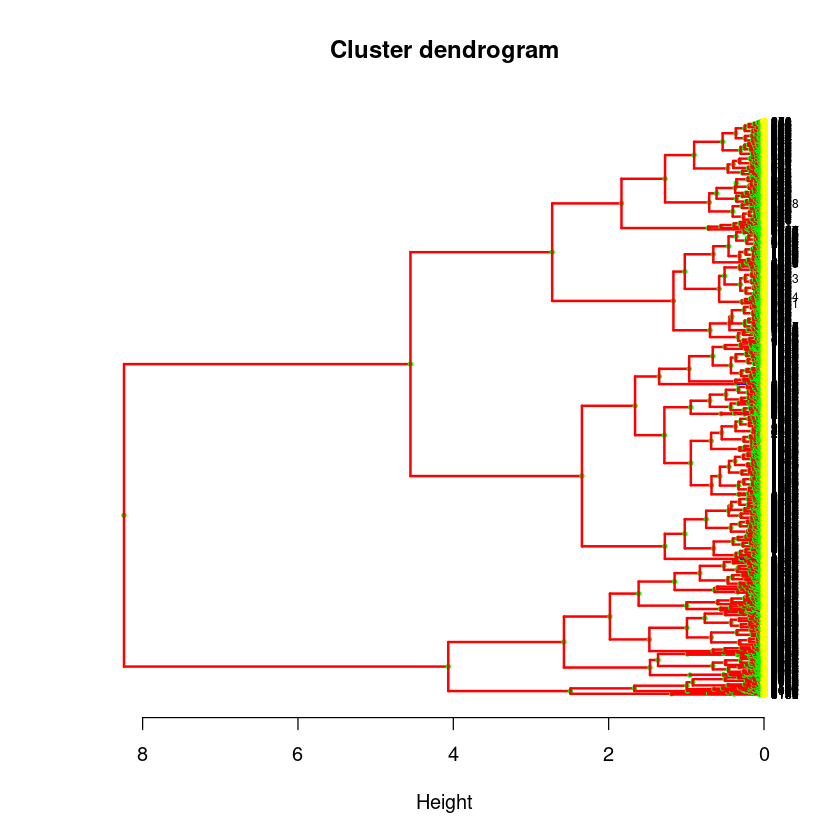

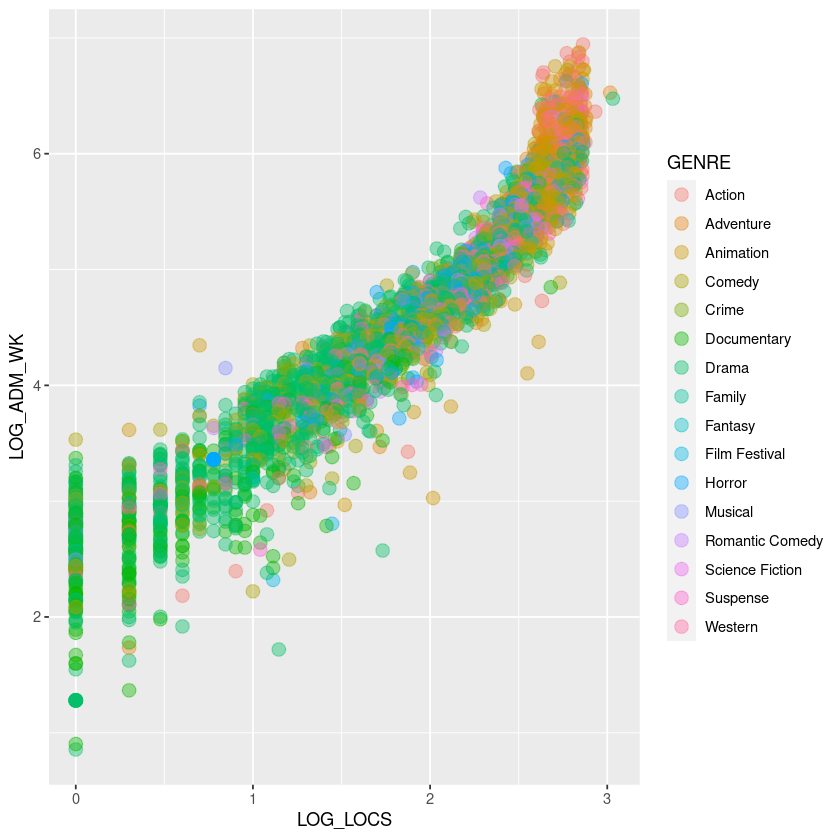

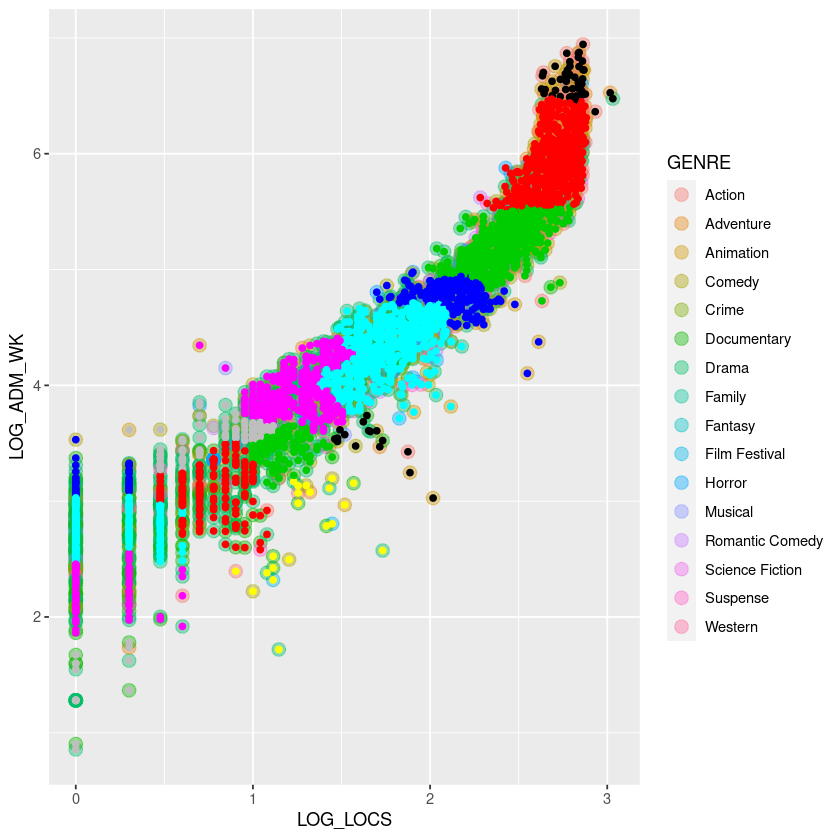

In [ ]:
# Clustering over de log of the data
cluster1 = hclust(dist(db1))
plot_dendogram(cluster1)
clusterCut1 = cutree(cluster1, 16)
ggplot(db1, aes(LOG_LOCS, LOG_ADM_WK, color = GENRE)) + 
  geom_point(alpha = 0.4, size = 3.5) #+ geom_point(col = clusterCut1) #+ 
ggplot(db1, aes(LOG_LOCS, LOG_ADM_WK, color = GENRE)) + 
  geom_point(alpha = 0.4, size = 3.5) + geom_point(col = clusterCut1)

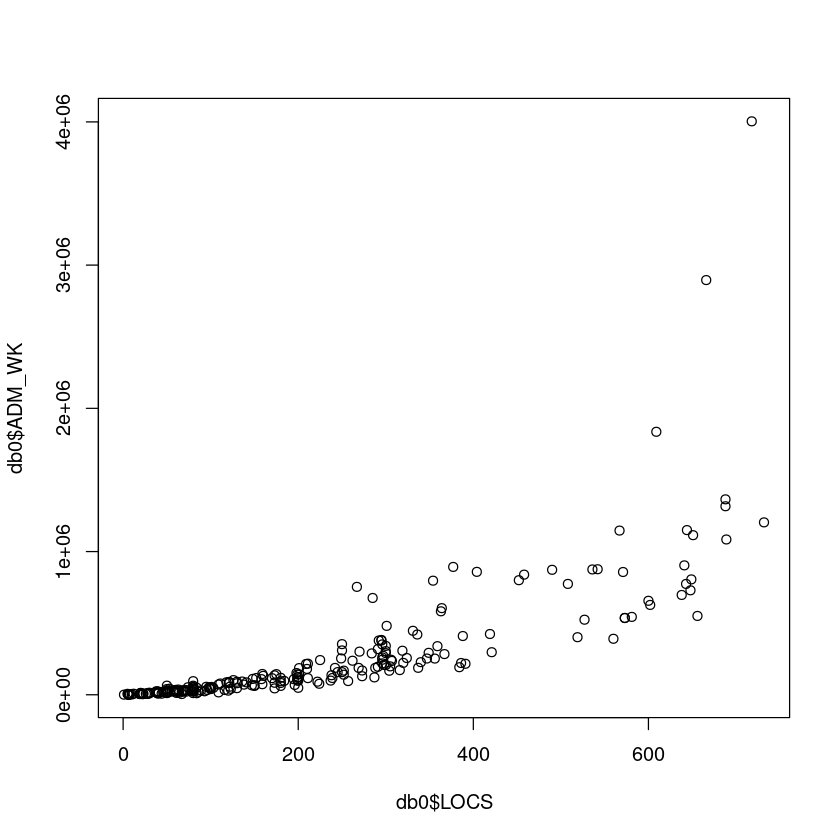

Warning message in dist(db0):
“NAs introduced by coercion”
Warning message in dist(db1):
“NAs introduced by coercion”


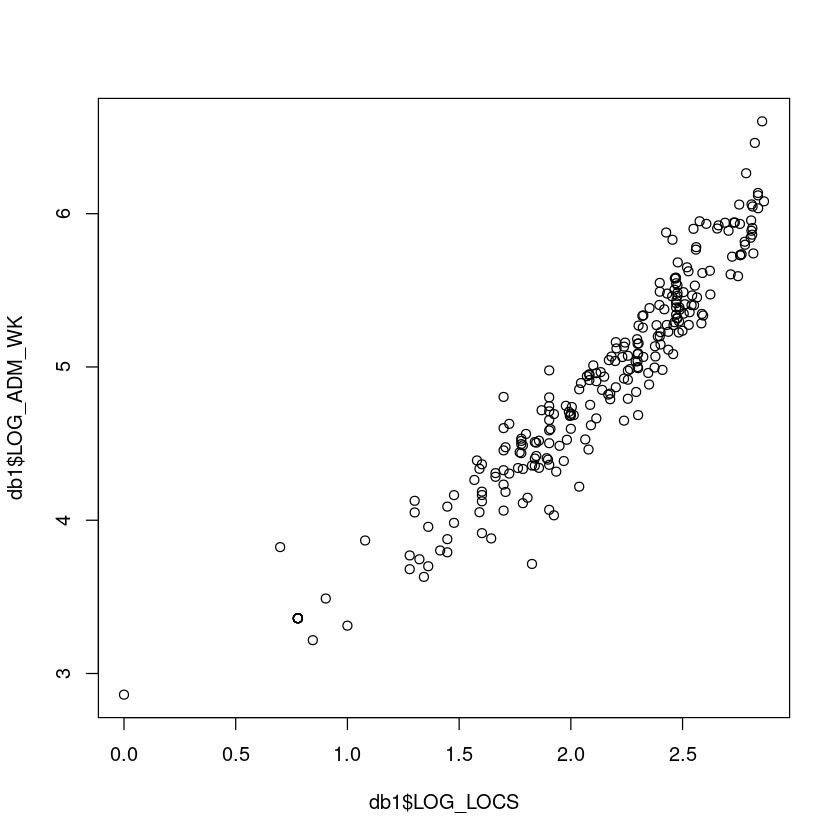

In [ ]:
# Subsetting horror films
library(ggplot2)
db = read.csv('peliculas.csv')
#head(db)
db = db[db$GENRE=="Horror",]

db0 = data.frame("DIST" = db$DIST, "LOCS" = db$LOCS, "ADM_WK" = db$ADM_WK)
db1 = data.frame("DIST" = db$DIST, "LOG_LOCS" = log(db$LOCS,10), "LOG_ADM_WK" = log(db$ADM_WK,10))

plot(db0$LOCS, db0$ADM_WK)
plot(db1$LOG_LOCS, db1$LOG_ADM_WK)

cluster0 = hclust(dist(db0))
cluster1 = hclust(dist(db1))

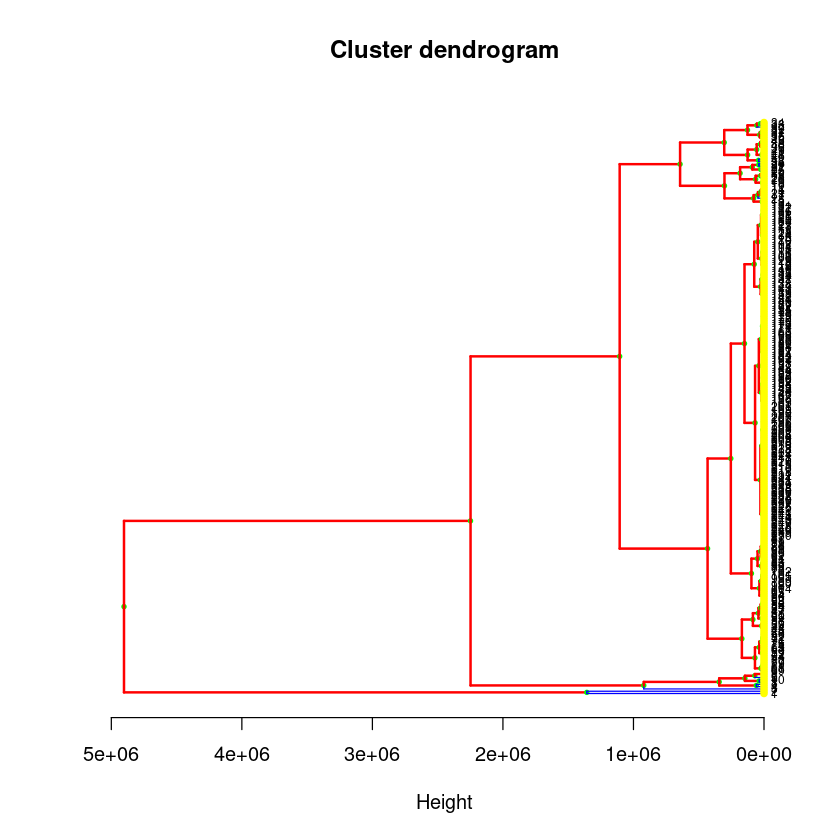

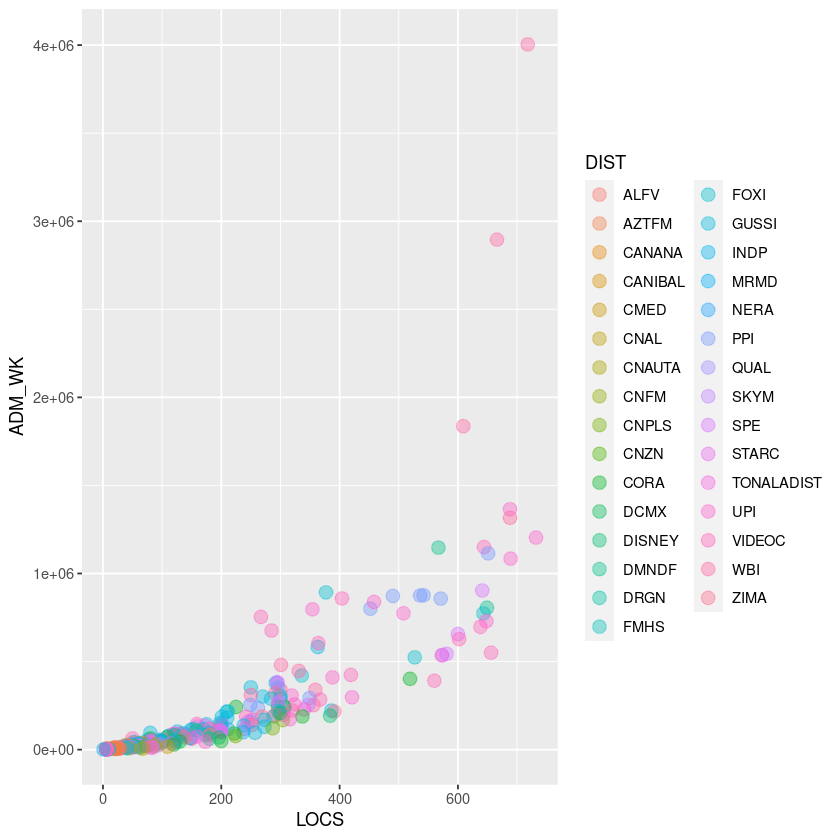

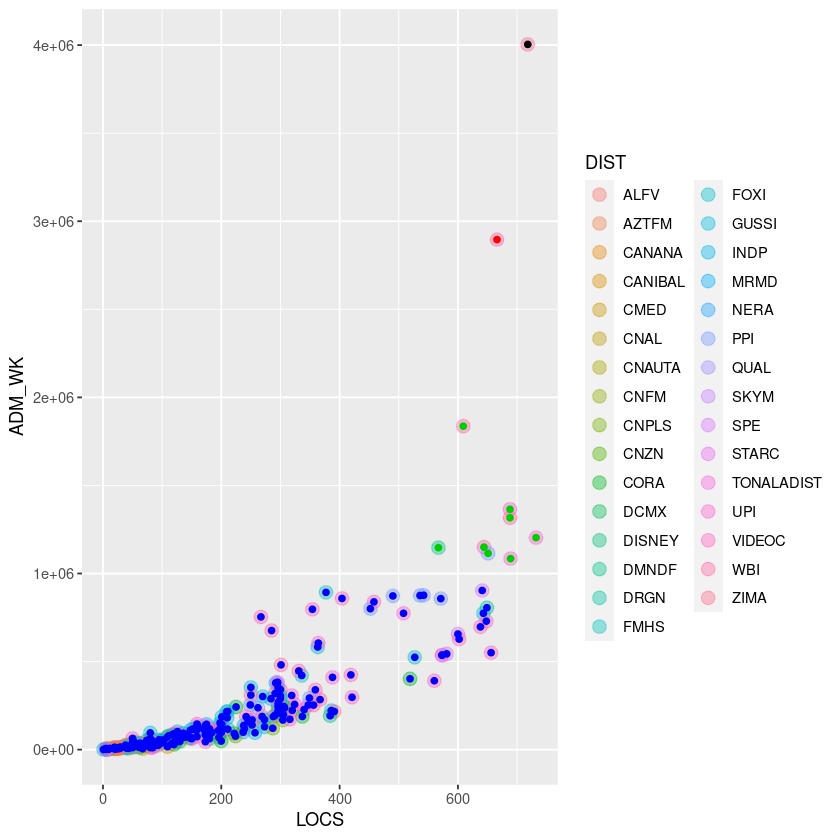

In [ ]:
plot_dendogram(cluster0)
# Clustering over de raw data
clusterCut0 = cutree(cluster0, 4)
ggplot(db0, aes(LOCS, ADM_WK, color = DIST)) + 
  geom_point(alpha = 0.4, size = 3.5) #+ geom_point(col = clusterCut0) #+ 
  #scale_color_manual(values = c('black', 'red', 'green'))
ggplot(db0, aes(LOCS, ADM_WK, color = DIST)) + 
  geom_point(alpha = 0.4, size = 3.5) + geom_point(col = clusterCut0)

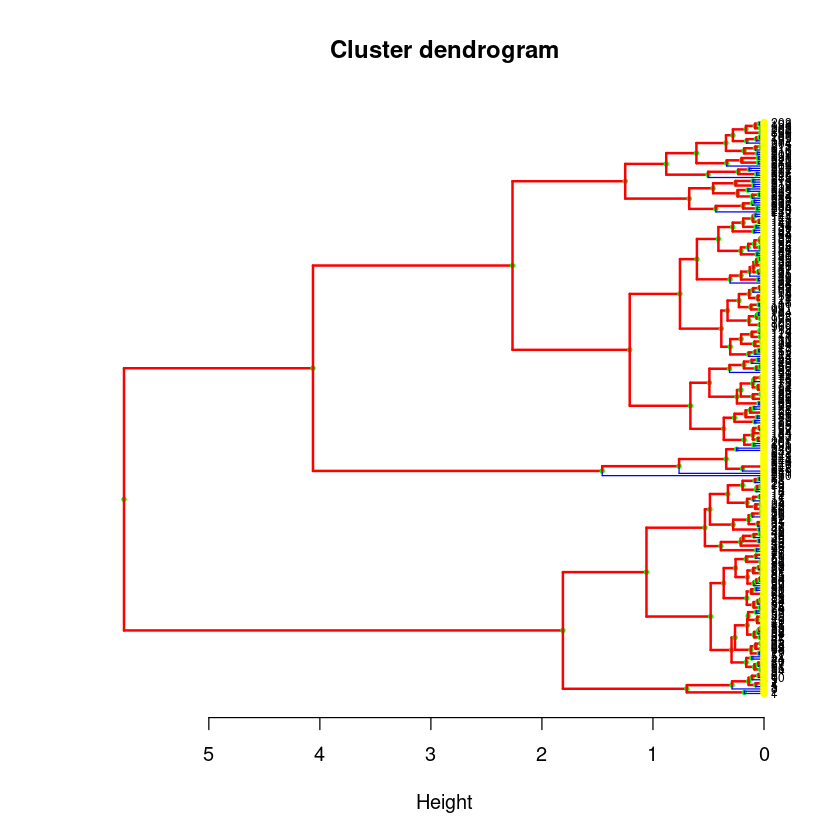

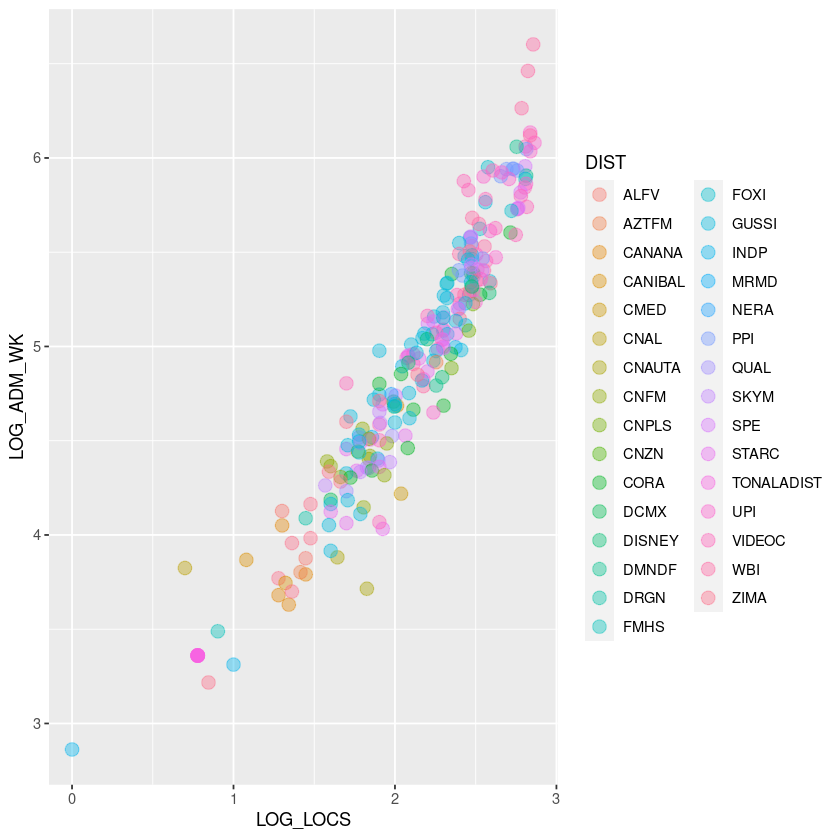

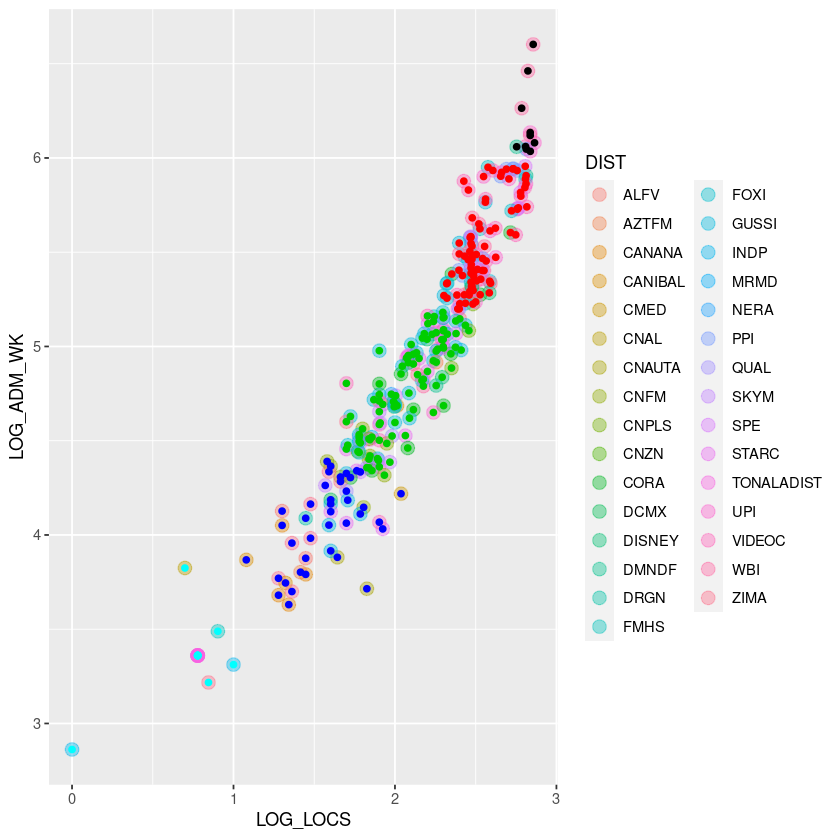

In [ ]:
# Clustering over de log of the data
plot_dendogram(cluster1)
clusterCut1 = cutree(cluster1, 5)
ggplot(db1, aes(LOG_LOCS, LOG_ADM_WK, color = DIST)) + 
  geom_point(alpha = 0.4, size = 3.5) #+ geom_point(col = clusterCut1) #+ 
ggplot(db1, aes(LOG_LOCS, LOG_ADM_WK, color = DIST)) + 
  geom_point(alpha = 0.4, size = 3.5) + geom_point(col = clusterCut1)

### K-promedios (k-means)

De manera análoga al agrupamiento jerárquico, k-means es un algoritmo goloso que sin embargo, resulta ser mucho más eficiente que el primero para encontrar etiquetas candidatas para agrupar a las observaciones en clusters. Dicha eficiencia va de la mano con que a diferencia del agrupamiento jerárquico, k-means requiere que de manera *a priori* se determine el número $k$ de clusters que se desea obtener. Lo anterior puede representar desde una decisión trivial hasta un reto que requiera de la exploración heurística de distintos valores de $k$.

El algoritmo se lleva a cabo mediante los siguientes pasos:

1. Se seleccionan $k$ observaciones al azar, las cuales fungirán como centroides de los clusters a generar.
2. Se agrupa a todas las observaciones dentro del cluster cuyo centroide se encuentre más cercano a cada observación.
3. Se recomputan los centroides de acuerdo con el promedio aritmético de las observaciones agrupadas.
4. Se repite el proceso de asignación de las observaciones a cada cluster pero utilizando los centroides recalculados.
5. Se repite el proceso hasta que los centroides recalculados en la iteración $i+1$ no sean "diferentes" de los de la iteración $i$.

Se conoce como centroide a aquel punto que es encontrado a partir de promediar (encontrar la mediana o minimizar alguna función de distanca) $n$ puntos que definen en dimensión 2 un polígono de $n-1$ lados, que en dimensiones mayores (más de dos atributos) se trata de un hiperpoliedro.

Tiene variaciones conocidas como **k-medianas** o **k-medioides** y la diferencia en la aplicación de ambos en contraste con k-means radica en cambiar el criterio mediante el que se calcula un nuevo centroide en el paso 3, ya sea por encontrar la mediana de los datos dentro del cluster o encontrando al dato que minimice alguna medida de distancia de las demás observaciones dentro del cluster respecto a él. Ambos algoritmos se diferencian de k-means en que el centroide elegido forma parte del conjunto de datos en ambos casos, mientras que en el caso del primero el promedio aritmético no necesariamente es un punto o valor que se encuentre dentro del conjunto de observaciones.

La **complejidad de este algoritmo es típicamente $nk$** con $n$ el número de observaciones y $k$ el número de centroides elegido. Esto suele ser típicamente más rápido que $n^2$ y por lo mismo se trata de uno de los algoritmos más usados para el agrupamiento de observaciones.

K-means es un algoritmo **no determinista**, esto debido a que los $k$ centroides iniciales son elegidos de manera aleatoria. Por lo tanto si dicha elección cambia, el resultado del agrupamiento final no será necesariamente el mismo.

La determinación del valor óptimo de $k$ puede hacerse a partir de un conjunto que esté conformado por $p$ tuplas de tamaño $k$ que alberguen a $k$ centroides seleccionados aleatoriamente. Posteriormente se puede aplicar k-means para cada una de estas tuplas y seleccionar aquel agrupamiento que tenga una menor medida de disimilaridad. Otra manera de guiar la elección del valor de $k$, sobre todo si el conjunto de datos es muy grande, es utilizar el algoritmo de **agrupamiento jerárquico** en una muestra de los datos para así determinar el valor de $k$ y posteriormente aplicar **k-means** sobre todo el conjunto.

